In [ ]:
import spacy
from spacy_layout import spaCyLayout
from pipeline_merge_pdf import process_pdf_folder
import os
import time

#Ordner, in dem PDFs liegen
#pdf_folder = "../data/DSA/Der_blaue_Bruder"
pdf_folder = "../data/DSA/Die_Stadt_des_Feuers"
merged_pdf_path = os.path.join(pdf_folder, "_combined.pdf")

#Prüfen ob eine merged-Datei bereits vorhanden ist. Falls nicht, diese erzeugen
if os.path.exists(merged_pdf_path):
    print("Die Datei _combined.pdf existiert bereits unter folgendem Pfad:",merged_pdf_path)
    print("Lade die Datei lokal..\n")
    time.sleep(0.5)
    nlp = spacy.blank("de")
    layout = spaCyLayout(nlp)
    doc = layout(merged_pdf_path)
else:
    print("Die Datei _combined.pdf existiert noch nicht. Merge-Pipeline wird durchgeführt..")
    time.sleep(0.5)
    #Pipeline ausführen
    doc = process_pdf_folder(pdf_folder)

#spaCy-Doc
print("\nAnzahl Layout-Spans:", len(doc.spans["layout"]))


Die Datei _combined.pdf existiert noch nicht. Merge-Pipeline wird durchgeführt..

Gefundene PDF-Dateien:
   ../data/DSA/Die_Stadt_des_Feuers/Die_Stadt_des_Feuers_1.pdf
   ../data/DSA/Die_Stadt_des_Feuers/Die_Stadt_des_Feuers_2.pdf
   ../data/DSA/Die_Stadt_des_Feuers/Die_Stadt_des_Feuers_3.pdf
   ../data/DSA/Die_Stadt_des_Feuers/Die_Stadt_des_Feuers_4.pdf
   ../data/DSA/Die_Stadt_des_Feuers/Die_Stadt_des_Feuers_5.pdf
   ../data/DSA/Die_Stadt_des_Feuers/Die_Stadt_des_Feuers_6.pdf
   ../data/DSA/Die_Stadt_des_Feuers/Die_Stadt_des_Feuers_7.pdf
   ../data/DSA/Die_Stadt_des_Feuers/Die_Stadt_des_Feuers_8.pdf
   ../data/DSA/Die_Stadt_des_Feuers/Die_Stadt_des_Feuers_9.pdf
   ../data/DSA/Die_Stadt_des_Feuers/Die_Stadt_des_Feuers_10.pdf
   ../data/DSA/Die_Stadt_des_Feuers/Die_Stadt_des_Feuers_11.pdf

🔄 PDFs werden zusammengeführt...



PDFs mergen: 100%|██████████| 11/11 [00:00<00:00, 322.31it/s]
2025-11-27 20:57:35,177 - INFO - detected formats: [<InputFormat.PDF: 'pdf'>]
2025-11-27 20:57:35,196 - INFO - Going to convert document batch...
2025-11-27 20:57:35,197 - INFO - Initializing pipeline for StandardPdfPipeline with options hash f9730ffaa6e7f8d4fb0c98c8df3f18cb
2025-11-27 20:57:35,198 - INFO - rapidocr cannot be used because onnxruntime is not installed.
2025-11-27 20:57:35,199 - INFO - easyocr cannot be used because it is not installed.
2025-11-27 20:57:35,200 - INFO - Accelerator device: 'cuda:0'
[INFO] 2025-11-27 20:57:35,207 [RapidOCR] base.py:22: Using engine_name: torch
[INFO] 2025-11-27 20:57:35,213 [RapidOCR] download_file.py:60: File exists and is valid: /home/timc/Workspace/nlp-rpg-narratives/nlp-rpg-venv/lib/python3.13/site-packages/rapidocr/models/ch_PP-OCRv4_det_infer.pth
[INFO] 2025-11-27 20:57:35,213 [RapidOCR] torch.py:54: Using /home/timc/Workspace/nlp-rpg-narratives/nlp-rpg-venv/lib/python3.13


✅ Erfolgreich gemerged zu: ../data/DSA/Die_Stadt_des_Feuers/_combined.pdf

📄 spaCyLayout liest das kombinierte PDF ein...



2025-11-27 20:57:35,406 - INFO - Auto OCR model selected rapidocr with torch.
2025-11-27 20:57:35,406 - INFO - Accelerator device: 'cuda:0'
2025-11-27 20:57:36,270 - INFO - Accelerator device: 'cuda:0'
2025-11-27 20:57:36,524 - INFO - Processing document _combined.pdf
2025-11-27 20:57:52,156 - INFO - Finished converting document _combined.pdf in 16.98 sec.


spaCy-Model und -Wrapper geladen.

Gesamtlänge des Textes: 184820

Anzahl Layout-Spans: 1626


In [ ]:
from pipeline_preproc_pdf import process_doc_into_posts #Zahlen, Satzzeichen entfernen + Lemma und Stemming ?? Satzzeichen?

#Posts extrahieren + bereinigen
posts = process_doc_into_posts(doc)

#Posts ausgeben
for i, p in enumerate(posts):
    print(f"--- Post {i+1} ---\n{p}\n")

--- Post 1 ---
Die Stadt des Feuers Der Neunaugensee Dunkel breitet sich das sehr tiefe Wasser, das bis an den Horizont im fernen Norden den Himmel berührt. Träge schlagen die Wellen an das Ufer an dem  sich das Schilf im sanften Wind wiest. In der weiten Ferne im glitzernden Wasser ragt majestätisch ein schwarzer Berg aus den Wellen und weißer Rauch steigt von seiner Spitze auf. Fern und doch unheimlich. Das ist Cealan, die verwunschene Insel die jeder Schiffer meidet. Sanfte Hügel und Wälder mit Gehöften und kleinen Dörfern dazwischen erstrecken sich dem gegenüber  ebenso  weit in den Süden. Und dazwischen verläuft die schier endlose Straße 60  Meilen zwischen der geschäftigen Stadt Trallop im Osten und dem  verschlafenen größeren Markt-Dorf Olat mit seiner Grafenburg Olats Feste, am  Rande  des riesigen Nebelmoores im Westen davon. Mehr  als ein Tagesmarsch und die Hälfte davon mit dem  Pferd. Und soweit erstreckt sich auch der Neunaugensee. Viele Sagen und Mythen und Sagen umranken

In [140]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer()
result = tfidf.fit_transform(posts)

In [145]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

german_stopwords = stopwords.words('german') #Stopwords aus NLTK laden

newwords = ["ja", "wurde", "wäre", "setzt", "mal", "habt", "12", "10", "100", "1000", "11", "00", "02", "053", "1012", "14", "15", "16", "20", "200"]
german_stopwords.extend(newwords)

print(german_stopwords)

tfidf = TfidfVectorizer(stop_words=german_stopwords, max_df=0.95, min_df=1)
result = tfidf.fit_transform(posts)


['aber', 'alle', 'allem', 'allen', 'aller', 'alles', 'als', 'also', 'am', 'an', 'ander', 'andere', 'anderem', 'anderen', 'anderer', 'anderes', 'anderm', 'andern', 'anderr', 'anders', 'auch', 'auf', 'aus', 'bei', 'bin', 'bis', 'bist', 'da', 'damit', 'dann', 'der', 'den', 'des', 'dem', 'die', 'das', 'dass', 'daß', 'derselbe', 'derselben', 'denselben', 'desselben', 'demselben', 'dieselbe', 'dieselben', 'dasselbe', 'dazu', 'dein', 'deine', 'deinem', 'deinen', 'deiner', 'deines', 'denn', 'derer', 'dessen', 'dich', 'dir', 'du', 'dies', 'diese', 'diesem', 'diesen', 'dieser', 'dieses', 'doch', 'dort', 'durch', 'ein', 'eine', 'einem', 'einen', 'einer', 'eines', 'einig', 'einige', 'einigem', 'einigen', 'einiger', 'einiges', 'einmal', 'er', 'ihn', 'ihm', 'es', 'etwas', 'euer', 'eure', 'eurem', 'euren', 'eurer', 'eures', 'für', 'gegen', 'gewesen', 'hab', 'habe', 'haben', 'hat', 'hatte', 'hatten', 'hier', 'hin', 'hinter', 'ich', 'mich', 'mir', 'ihr', 'ihre', 'ihrem', 'ihren', 'ihrer', 'ihres', 'euc

[nltk_data] Downloading package stopwords to /home/timc/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


## EXKURS - START

In [ ]:
#Satzzeichen-Entfernung (Für DSA sinnvoll)
import re
import nltk
from nltk.tokenize import word_tokenize

nltk.download('punkt')

text = "This is a sample sentence, showing off the stop words filtration."
print("Original:",text)
tokens = word_tokenize(text)
print("Tokenisiert:",tokens)
# Regular expression to match punctuation
cleaned_tokens = [re.sub(r'[^\w\s]', '', token) for token in tokens if re.sub(r'[^\w\s]', '', token)]
print("Bereinigt:",cleaned_tokens)

Original: This is a sample sentence, showing off the stop words filtration.
Tokenisiert: ['This', 'is', 'a', 'sample', 'sentence', ',', 'showing', 'off', 'the', 'stop', 'words', 'filtration', '.']
Bereinigt: ['This', 'is', 'a', 'sample', 'sentence', 'showing', 'off', 'the', 'stop', 'words', 'filtration']


[nltk_data] Downloading package punkt to /home/timc/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [ ]:
#Deutscher spacy Lemmetization
import spacy
nlp = spacy.load("de_core_news_sm")

for word in texts:
    print("Original:",word)
    doc = nlp(word)
    print("Stemming:",[token.lemma_ for token in doc])
    print("-------------------------")


Original: überzeugende
Stemming: ['überzeugend']
-------------------------
Original: überzeugt
Stemming: ['überzeugen']
-------------------------
Original: überzeugungsarbeit
Stemming: ['Überzeugungsarbeit']
-------------------------
Original: üblem
Stemming: ['übl']
-------------------------
Original: üblich
Stemming: ['üblich']
-------------------------
Original: üblichen
Stemming: ['üblichen']
-------------------------
Original: übrig
Stemming: ['übrig']
-------------------------
Original: übrigens
Stemming: ['übrigens']
-------------------------
Original: üppig
Stemming: ['üppig']
-------------------------
Original: üppigen
Stemming: ['üppigen']
-------------------------
Original: im übrigen geh ich übrigens raus
Stemming: ['in', 'übrig', 'geh', 'ich', 'übrigens', 'raus']
-------------------------
Original: ich rannte und renne die kinder rennen
Stemming: ['ich', 'rennen', 'und', 'rennen', 'der', 'Kind', 'rennen']
-------------------------


## EXKURS - ENDE

In [146]:
import pandas as pd

words = tfidf.get_feature_names_out()
df = pd.DataFrame(result.toarray(), columns=words)
print(df)

     24698  250  300   4x   50        60      6000   70   aa       ab  ...  \
0      0.0  0.0  0.0  0.0  0.0  0.047264  0.047264  0.0  0.0  0.00000  ...   
1      0.0  0.0  0.0  0.0  0.0  0.000000  0.000000  0.0  0.0  0.00000  ...   
2      0.0  0.0  0.0  0.0  0.0  0.000000  0.000000  0.0  0.0  0.00000  ...   
3      0.0  0.0  0.0  0.0  0.0  0.000000  0.000000  0.0  0.0  0.16508  ...   
4      0.0  0.0  0.0  0.0  0.0  0.000000  0.000000  0.0  0.0  0.00000  ...   
..     ...  ...  ...  ...  ...       ...       ...  ...  ...      ...  ...   
334    0.0  0.0  0.0  0.0  0.0  0.000000  0.000000  0.0  0.0  0.00000  ...   
335    0.0  0.0  0.0  0.0  0.0  0.000000  0.000000  0.0  0.0  0.00000  ...   
336    0.0  0.0  0.0  0.0  0.0  0.000000  0.000000  0.0  0.0  0.00000  ...   
337    0.0  0.0  0.0  0.0  0.0  0.000000  0.000000  0.0  0.0  0.00000  ...   
338    0.0  0.0  0.0  0.0  0.0  0.000000  0.000000  0.0  0.0  0.00000  ...   

     überzeugende  überzeugt  überzeugungsarbeit  üblem  üblich

In [147]:
for i, doc in enumerate(posts):
    print(f"\n--- Wichtigste Wörter in Post {i+1} ---")
    row = df.iloc[i]
    print(row.sort_values(ascending=False).head(7))



--- Wichtigste Wörter in Post 1 ---
insel           0.158716
stadt           0.142872
see             0.133899
neunaugensee    0.116404
norden          0.112842
neben           0.109756
trallop         0.104599
Name: 0, dtype: float64

--- Wichtigste Wörter in Post 2 ---
platzhalter      1.0
rein             0.0
rosewein         0.0
rose             0.0
rolle            0.0
rohen            0.0
rogengarnitur    0.0
Name: 1, dtype: float64

--- Wichtigste Wörter in Post 3 ---
wasser        0.267997
münzen        0.248953
verhexen      0.248953
verkaufen     0.220830
sammeln       0.220830
darum         0.192706
aventurien    0.124477
Name: 2, dtype: float64

--- Wichtigste Wörter in Post 4 ---
wanderer       0.298665
leinen         0.218687
verspricht     0.218687
geritten       0.218687
einzukehren    0.218687
bauersleut     0.218687
beschloß       0.218687
Name: 3, dtype: float64

--- Wichtigste Wörter in Post 5 ---
immer           0.169400
zimmer          0.159709
wirt            0.

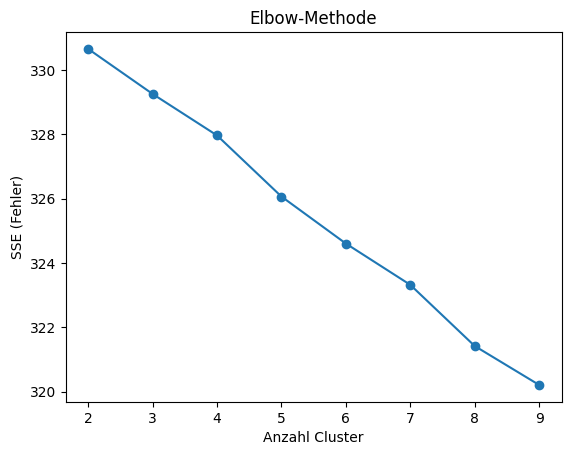

In [148]:
#Wie viele Cluster sind sinnvoll? (Elbow-Methode)
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

sse = []
K = range(2, 10)  # teste 2-9 Cluster

for k in K:
    km = KMeans(n_clusters=k, random_state=42)
    km.fit(result)
    sse.append(km.inertia_)

plt.plot(K, sse, '-o')
plt.xlabel("Anzahl Cluster")
plt.ylabel("SSE (Fehler)")
plt.title("Elbow-Methode")
plt.show()

In [149]:
#Clustering mittels k-means
from sklearn.cluster import KMeans

#KMeans Clustering
k = 7  # Anzahl Cluster
model = KMeans(n_clusters=k, random_state=42)
model.fit(result)

#Cluster-Zuordnung pro Dokument
labels = model.labels_

for i, (doc, label) in enumerate(zip(posts, labels)):
    print(f"[Cluster {label}] {doc}")

[Cluster 2] Die Stadt des Feuers Der Neunaugensee Dunkel breitet sich das sehr tiefe Wasser, das bis an den Horizont im fernen Norden den Himmel berührt. Träge schlagen die Wellen an das Ufer an dem  sich das Schilf im sanften Wind wiest. In der weiten Ferne im glitzernden Wasser ragt majestätisch ein schwarzer Berg aus den Wellen und weißer Rauch steigt von seiner Spitze auf. Fern und doch unheimlich. Das ist Cealan, die verwunschene Insel die jeder Schiffer meidet. Sanfte Hügel und Wälder mit Gehöften und kleinen Dörfern dazwischen erstrecken sich dem gegenüber  ebenso  weit in den Süden. Und dazwischen verläuft die schier endlose Straße 60  Meilen zwischen der geschäftigen Stadt Trallop im Osten und dem  verschlafenen größeren Markt-Dorf Olat mit seiner Grafenburg Olats Feste, am  Rande  des riesigen Nebelmoores im Westen davon. Mehr  als ein Tagesmarsch und die Hälfte davon mit dem  Pferd. Und soweit erstreckt sich auch der Neunaugensee. Viele Sagen und Mythen und Sagen umranken di

In [150]:
#Welche Wörter charakterisieren jedes Cluster?
import numpy as np

words = tfidf.get_feature_names_out()
centers = model.cluster_centers_

for i in range(k):
    print(f"\nTop-Wörter Cluster {i}:")
    top_indices = centers[i].argsort()[::-1][:10]  #10 wichtigste Wörter
    print([words[idx] for idx in top_indices])


Top-Wörter Cluster 0:
['gehen', 'fragt', 'ritter', 'nindariel', 'bergor', 'brick', 'magier', 'olat', 'sumudan', 'gut']

Top-Wörter Cluster 1:
['boot', 'blickt', 'kurz', 'nindariel', 'herren', 'sumudan', 'sollten', 'gundar', 'dan', 'schon']

Top-Wörter Cluster 2:
['see', 'schrein', 'pandlaril', 'vielleicht', 'gibt', 'feuer', 'stadt', 'nindariel', 'morgen', 'dan']

Top-Wörter Cluster 3:
['antwortet', 'mehr', 'nindariel', 'harald', 'daher', 'darüber', 'stimmt', 'bisher', 'magus', 'gefährlich']

Top-Wörter Cluster 4:
['sumudan', 'haus', 'geht', 'nindariel', 'schon', 'tür', 'dan', 'sieht', 'guarion', 'bergor']

Top-Wörter Cluster 5:
['brick', 'bergor', '24698', 'gelöscht', 'erklärt', 'magier', 'harald', 'dank', 'gerne', 'herr']

Top-Wörter Cluster 6:
['hört', 'folgt', 'nindariel', 'ab', 'fasziniert', 'hakt', 'sumudan', 'geräusche', 'ausführungen', 'brick']


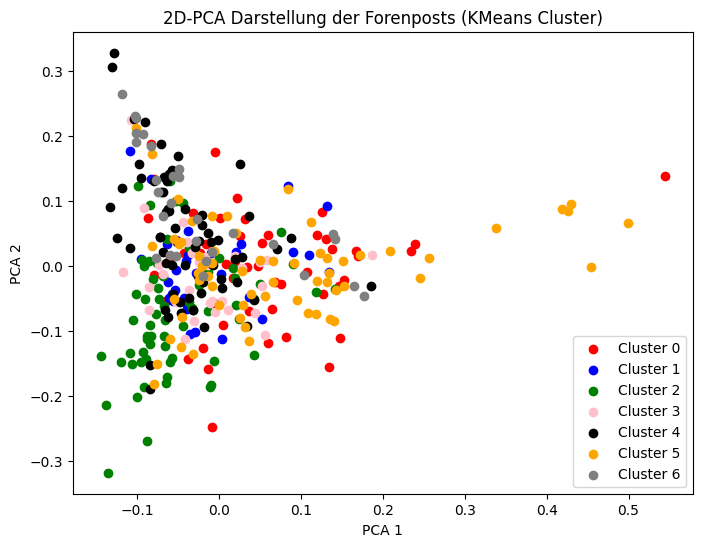

In [175]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
import numpy as np

# PCA zur 2D-Visualisierung
pca = PCA(n_components=2)
tfidf_2d = pca.fit_transform(result.toarray())

# Cluster-Farben
colors = ['red', 'blue', 'green', 'pink', 'black', 'orange', 'grey'] #, 'black', 'orange', 'grey'

plt.figure(figsize=(8, 6))
for i in range(k):
    points = tfidf_2d[labels == i]
    plt.scatter(points[:, 0], points[:, 1], c=colors[i], label=f"Cluster {i}")

plt.title("2D-PCA Darstellung der Forenposts (KMeans Cluster)")
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.legend()
plt.show()


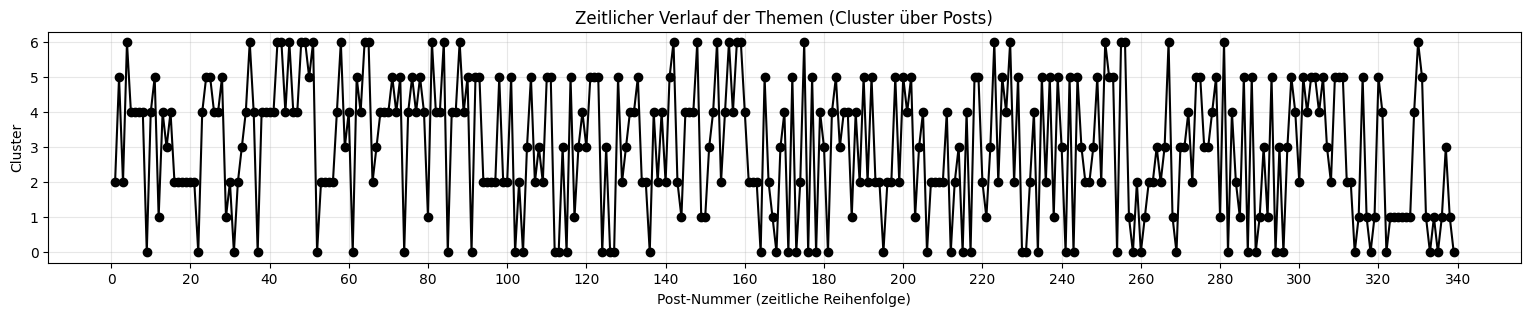

In [170]:
import matplotlib.ticker as ticker

plt.figure(figsize=(19, 3))
plt.plot(range(1, len(labels)+1), labels, marker='o', linestyle='-', color='black')

# Maximal 20 Ticks auf der X-Achse
ax = plt.gca()
ax.xaxis.set_major_locator(ticker.MaxNLocator(nbins=20))

plt.yticks(sorted(set(labels)))
plt.xlabel("Post-Nummer (zeitliche Reihenfolge)")
plt.ylabel("Cluster")
plt.title("Zeitlicher Verlauf der Themen (Cluster über Posts)")

plt.grid(True, alpha=0.3)
plt.show()


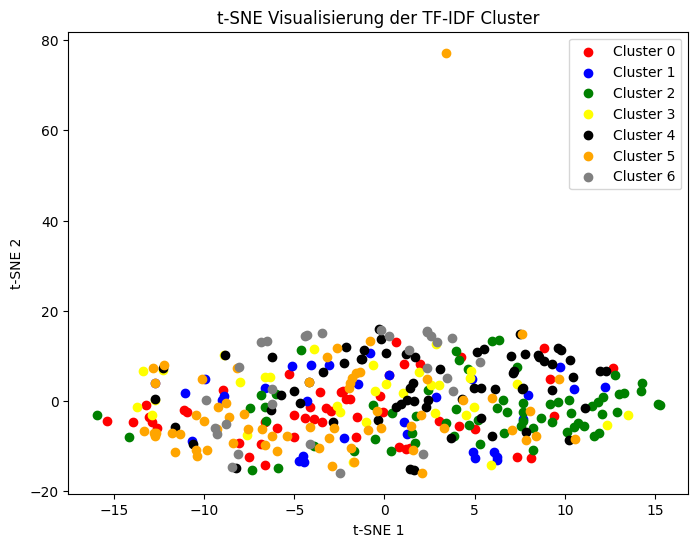

In [157]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import numpy as np

# t-SNE erzeugen (2 Dimensionen)
tsne = TSNE(n_components=2, random_state=42, perplexity=50)
tfidf_tsne = tsne.fit_transform(result.toarray())

# Plot
plt.figure(figsize=(8, 6))
colors = ['red', 'blue', 'green', "yellow", 'black', 'orange', 'grey']

for i in range(k):
    pts = tfidf_tsne[labels == i]
    plt.scatter(pts[:, 0], pts[:, 1], c=colors[i], label=f"Cluster {i}")

plt.title("t-SNE Visualisierung der TF-IDF Cluster")
plt.xlabel("t-SNE 1")
plt.ylabel("t-SNE 2")
plt.legend()
plt.show()


/home/timc/Workspace/nlp-rpg-narratives/nlp-rpg-venv/lib/python3.13/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


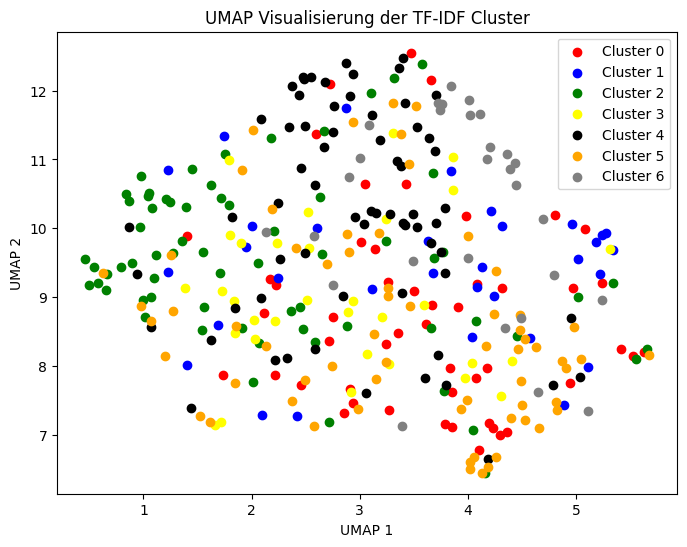

In [158]:
import umap
import matplotlib.pyplot as plt

# UMAP erzeugen
umap_model = umap.UMAP(n_components=2, random_state=42)
tfidf_umap = umap_model.fit_transform(result.toarray())

# Plot
plt.figure(figsize=(8, 6))
colors = ['red', 'blue', 'green', 'yellow', 'black', 'orange', 'grey']

for i in range(k):
    pts = tfidf_umap[labels == i]
    plt.scatter(pts[:, 0], pts[:, 1], c=colors[i], label=f"Cluster {i}")

plt.title("UMAP Visualisierung der TF-IDF Cluster")
plt.xlabel("UMAP 1")
plt.ylabel("UMAP 2")
plt.legend()
plt.show()


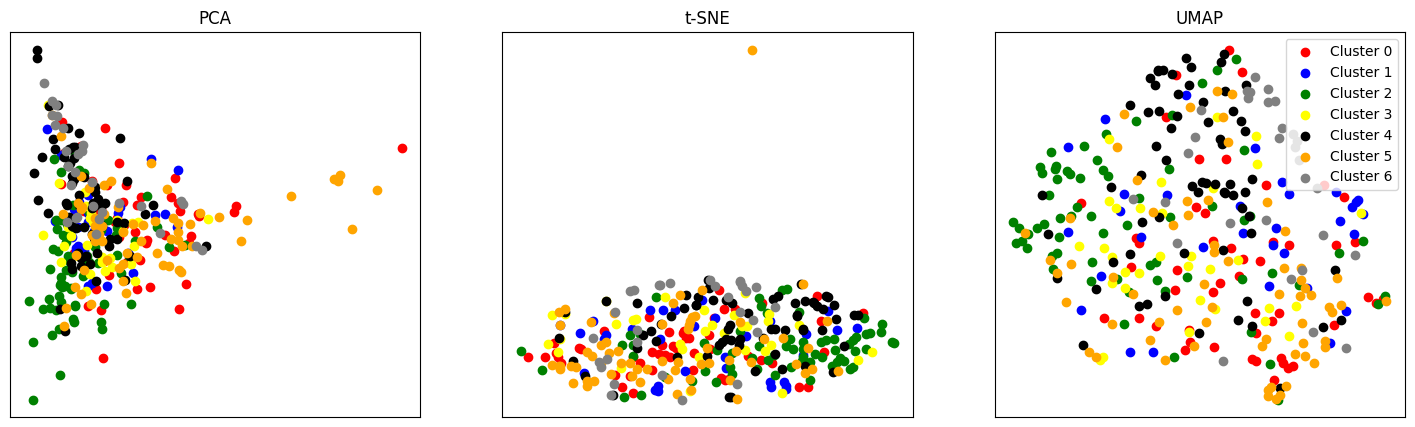

In [173]:
# PCA zur 2D-Visualisierung
pca = PCA(n_components=2)
tfidf_2d = pca.fit_transform(result.toarray())

fig, axs = plt.subplots(1, 3, figsize=(18, 5))

methods = {
    "PCA": tfidf_2d,
    "t-SNE": tfidf_tsne,
    "UMAP": tfidf_umap
}

for ax, (name, emb) in zip(axs, methods.items()):
    for i in range(k):
        pts = emb[labels == i]
        ax.scatter(pts[:, 0], pts[:, 1], c=colors[i], label=f"Cluster {i}")
    ax.set_title(name)
    ax.set_xticks([])
    ax.set_yticks([])

plt.legend()
plt.show()


/home/timc/Workspace/nlp-rpg-narratives/nlp-rpg-venv/lib/python3.13/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


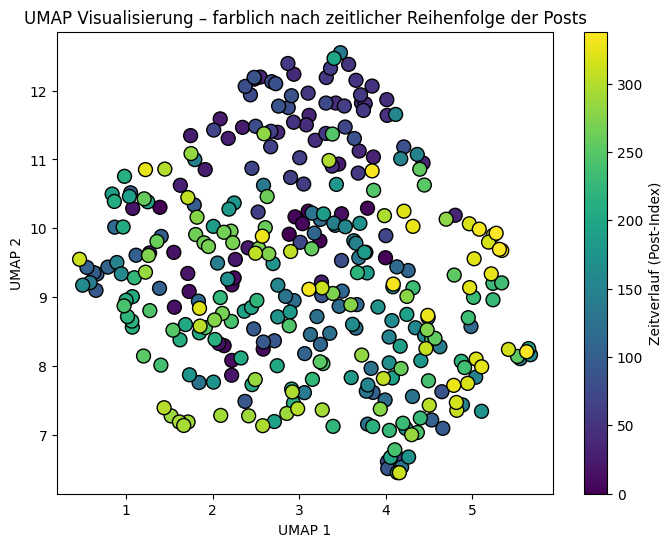

In [160]:
import umap
import matplotlib.pyplot as plt
import numpy as np

# UMAP berechnen (2D)
umap_model = umap.UMAP(n_components=2, random_state=42)
tfidf_umap = umap_model.fit_transform(result.toarray())

# Zeitindex = einfach die Reihenfolge 0,1,2,... der Dokumente
time_index = np.arange(len(posts))

plt.figure(figsize=(8, 6))

# Scatterplot: Farbe = Zeitverlauf
scatter = plt.scatter(
    tfidf_umap[:, 0],
    tfidf_umap[:, 1],
    c=time_index,
    cmap="viridis",
    s=100,
    edgecolors='black'
)

plt.colorbar(scatter, label="Zeitverlauf (Post-Index)")
plt.title("UMAP Visualisierung – farblich nach zeitlicher Reihenfolge der Posts")
plt.xlabel("UMAP 1")
plt.ylabel("UMAP 2")

plt.show()


In [166]:
import umap
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import numpy as np

# ----------------------------
#  1. UMAP berechnen
# ----------------------------
umap_model = umap.UMAP(n_components=2, random_state=42)
tfidf_umap = umap_model.fit_transform(result.toarray())

# Zeitindex = Reihenfolge der Posts
time_index = np.arange(len(posts))

# ----------------------------
#  2. Animation vorbereiten
# ----------------------------
fig, ax = plt.subplots(figsize=(8, 6))

# Hintergrundpunkte anzeigen
ax.scatter(tfidf_umap[:, 0], tfidf_umap[:, 1], c='lightgray', s=50)

# Animierter Scatterplot (startet leer)
scatter = ax.scatter(
    [], [],
    c=[],                     # Farben werden dynamisch gesetzt
    cmap="viridis",
    s=120,
    edgecolors="black",
    vmin=time_index.min(),
    vmax=time_index.max()
)

ax.set_title("UMAP – Animierter zeitlicher Verlauf der Forenposts")
ax.set_xlabel("UMAP 1")
ax.set_ylabel("UMAP 2")

# ----------------------------
#  3. Update-Funktion
# ----------------------------
def update(frame):
    # Werte bis zum aktuellen Frame anzeigen
    current_x = tfidf_umap[:frame+1, 0]
    current_y = tfidf_umap[:frame+1, 1]

    scatter.set_offsets(np.c_[current_x, current_y])
    scatter.set_array(time_index[:frame+1])  # Farben nach Zeitverlauf

    return scatter,

# ----------------------------
#  4. Animation erzeugen
# ----------------------------
ani = animation.FuncAnimation(
    fig,
    update,
    frames=len(posts),
    interval=800,
    repeat=False
)

# ----------------------------
#  5. Export als GIF
# ----------------------------
ani.save(
    "umap_timeline.gif",
    writer="imagemagick",
    dpi=120
)

# ----------------------------
#  6. Export als MP4
# ----------------------------
ani.save(
    "umap_timeline.mp4",
    writer="ffmpeg",
    fps=1   # 1 Frame pro Sekunde → 800ms wie Animation
)

plt.close(fig)   # Fenster schließen nach Export

print("GIF und MP4 erfolgreich gespeichert!")


/home/timc/Workspace/nlp-rpg-narratives/nlp-rpg-venv/lib/python3.13/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(
/home/timc/Workspace/nlp-rpg-narratives/nlp-rpg-venv/lib/python3.13/site-packages/matplotlib/animation.py:908: UserWarning: Animation was deleted without rendering anything. This is most likely not intended. To prevent deletion, assign the Animation to a variable, e.g. `anim`, that exists until you output the Animation using `plt.show()` or `anim.save()`.
  warnings.warn(
2025-11-27 21:23:39,810 - WARNING - MovieWriter imagemagick unavailable; using Pillow instead.
2025-11-27 21:23:39,811 - INFO - Animation.save using <class 'matplotlib.animation.PillowWriter'>
2025-11-27 21:23:56,655 - INFO - Animation.save using <class 'matplotlib.animation.FFMpegWriter'>
2025-11-27 21:23:56,656 - INFO - MovieWriter._run: running command: ffmpeg -f rawvideo -vcodec rawvideo -s 800x600 -pix_fmt rg

GIF und MP4 erfolgreich gespeichert!


_________________________

# tf-idf auf pos-tags

In [2]:
import spacy
from spacy_layout import spaCyLayout
from pipeline_merge_pdf import process_pdf_folder
import os
import time

#Ordner, in dem PDFs liegen
pdf_folder = "../data/DSA/Der_blaue_Bruder"
#pdf_folder = "../data/DSA/Die_Stadt_des_Feuers"
merged_pdf_path = os.path.join(pdf_folder, "_combined.pdf")

#Prüfen ob eine merged-Datei bereits vorhanden ist. Falls nicht, diese erzeugen
if os.path.exists(merged_pdf_path):
    print("Die Datei _combined.pdf existiert bereits unter folgendem Pfad:",merged_pdf_path)
    print("Lade die Datei lokal..\n")
    time.sleep(0.5)
    nlp = spacy.blank("de")
    layout = spaCyLayout(nlp)
    doc = layout(merged_pdf_path)
else:
    print("Die Datei _combined.pdf existiert noch nicht. Merge-Pipeline wird durchgeführt..")
    time.sleep(0.5)
    #Pipeline ausführen
    doc = process_pdf_folder(pdf_folder)

#spaCy-Doc
print("\nAnzahl Layout-Spans:", len(doc.spans["layout"]))

Die Datei _combined.pdf existiert bereits unter folgendem Pfad: ../data/DSA/Der_blaue_Bruder/_combined.pdf
Lade die Datei lokal..



2025-11-28 13:14:49,614 - INFO - detected formats: [<InputFormat.PDF: 'pdf'>]
2025-11-28 13:14:49,632 - INFO - Going to convert document batch...
2025-11-28 13:14:49,633 - INFO - Initializing pipeline for StandardPdfPipeline with options hash f9730ffaa6e7f8d4fb0c98c8df3f18cb
2025-11-28 13:14:49,634 - INFO - rapidocr cannot be used because onnxruntime is not installed.
2025-11-28 13:14:49,636 - INFO - easyocr cannot be used because it is not installed.
2025-11-28 13:14:49,638 - INFO - Accelerator device: 'cuda:0'
[INFO] 2025-11-28 13:14:49,650 [RapidOCR] base.py:22: Using engine_name: torch
[INFO] 2025-11-28 13:14:49,656 [RapidOCR] download_file.py:60: File exists and is valid: /home/timc/Workspace/nlp-rpg-narratives/nlp-rpg-venv/lib/python3.13/site-packages/rapidocr/models/ch_PP-OCRv4_det_infer.pth
[INFO] 2025-11-28 13:14:49,656 [RapidOCR] torch.py:54: Using /home/timc/Workspace/nlp-rpg-narratives/nlp-rpg-venv/lib/python3.13/site-packages/rapidocr/models/ch_PP-OCRv4_det_infer.pth
[INFO


Anzahl Layout-Spans: 1833


In [3]:
from pipeline_preproc_pdf import process_doc_into_posts

#Posts extrahieren + bereinigen
posts = process_doc_into_posts(doc)

#Posts ausgeben
for i, p in enumerate(posts):
    print(f"--- Post {i+1} ---\n{p}\n")

--- Post 1 ---
Die Grafschaft Heldentrutz zwischen Finsterkamm und Finsterbach ist eine der ärmsten und wildesten Regionen Weidens. Sie wird von zahlreichen dichten und gefährlichen Wäldern, mit Harpyien, Orks und Drachen, urwüchsigen Wiesen sowie von Heide- und Moorlandschaften geprägt. Neben ein wenig Kornwirtschaft betreiben die Leute vor allem Kohl- und Rübenanbau, sowie Viehwirtschaft, vor allem Schafe und Ziegen. Einzige  Ausnahme  in der ganzen Ärmlichkeit ist die Baronie Nordhag mit der gleichnamigen Stadt, die durch die dort vorhandenen Salzvorkommen zu Reichtum gekommen  ist.  Nordhag bildet das wirtschaftliche und kulturelle Zentrum der Grafschaft, liegt an wichtigen Handelswegen (Norrnstieg, Alter Weg,  Alte Straße), richtet zweimal  im Jahr den großen Wollmarkt aus und ist durch die Feste Norrbrug ganz gut geschützt. Am 10. Efferd des Jahres 1040 BF, zur Zeit des zweiten Wollmarktes leben in Nordhag um  die 900 Einwohner, man  findet dort Tempel  von Rondra, Phex, Peraine 

In [4]:
import spacy
from spacy.matcher import Matcher

nlp = spacy.load("de_core_news_lg")

reise_patterns = [
    # wanderte, wanderten, wanderst, wandert, etc.
    [{"LOWER": {"REGEX": "^wander"} , "POS": "VERB"}],

    # Lemma: reisen, ziehen, marschieren, durchqueren
    [{"LEMMA": {"IN": ["erreichen","reisen","ziehen","marschieren","durchqueren"]}, "POS": "VERB"}],

    # trennbares aufbrechen → brach ... auf
    [{"LEMMA": "brechen", "POS": "VERB"}, {"LOWER": "auf"}],

    # Nomen
    [{"LEMMA": {"IN": ["reise","weg","pfad","expedition","marsch"]}, "POS": "NOUN"}],
]

kampf_patterns = [
    [{"LEMMA": {"IN": ["kämpfen","angreifen","verteidigen","zuschlagen","stechen"]}, "POS": "VERB"}],
    [{"LEMMA": {"IN": ["kampf","angriff","duell","schlacht","gegner","feind"]}, "POS": "NOUN"}]
]

ausruhen_patterns = [
    # ruhten
    [{"LEMMA": {"IN": ["ruhen","rasten","schlafen","lagern","entspannen"]}, "POS": "VERB"}],
    
    # ruhten ... aus  (trennbar!)
    [{"LEMMA": "ruhen"}, {"LOWER": "aus"}],

    # Nomen
    [{"LEMMA": {"IN": ["rast","pause","lager","ruhe","erholung"]}, "POS": "NOUN"}]
]

rettung_patterns = [
    [{"LEMMA": {"IN": ["retten","befreien","beschützen","opfern"]}, "POS": "VERB"}],
    [{"LOWER": {"IN": ["rettung","hilferuf","opfer","heldentat","gefahr","bedrohung"]}, "POS": "NOUN"}]
]

flucht_patterns = [
    # fliehen, entkommen, flüchten
    [{"LEMMA": {"IN": ["fliehen","entkommen","flüchten","verstecken"]}, "POS": "VERB"}],

    # trennbares wegrennen / rannte ... weg
    [{"LEMMA": "rennen", "POS": "VERB"}, {"LOWER": "weg"}],
    [{"LOWER": "weg"}, {"LEMMA": "rennen"}],

    [{"LEMMA": {"IN": ["flucht","unterschlupf","versteck","panik"]}, "POS": "NOUN"}]
]

training_patterns = [
    [{"LEMMA": {"IN": ["trainieren","üben","vorbereiten","meditieren"]}, "POS": "VERB"}],
    [{"LEMMA": {"IN": ["training","übung","vorbereitung","lektion","technik"]}, "POS": "NOUN"}]
]

verfolgung_patterns = [
    [{"LEMMA": {"IN": ["verfolgen","jagen","suchen"]}, "POS": "VERB"}],
    [{"LEMMA": "spüren", "POS": "VERB"}, {"LOWER": "auf"}],
    [{"LEMMA": {"IN": ["verfolgung","jagd","spur","fährte"]}, "POS": "NOUN"}]
]

ruf_patterns = [
    [{"LEMMA": {"IN": ["rufen","einladen","beauftragen","verkünden","offenbaren"]}, "POS": "VERB"}],
    [{"LEMMA": {"IN": ["ruf","auftrag","prophezeiung","vision","botschaft"]}, "POS": "NOUN"}]
]
belohnung_patterns = [
    [{"LEMMA": {"IN": ["belohnen","erkennen","verstehen","entdecken","gewinnen"]}, "POS": "VERB"}],
    [{"LEMMA": {"IN": ["belohnung","schatz","erkenntnis","wahrheit","einsicht"]}, "POS": "NOUN"}]
]

categories = {
    "Reise": reise_patterns,
    "Kampf": kampf_patterns,
    "Ausruhen": ausruhen_patterns,
    "Rettung": rettung_patterns,
    "Flucht": flucht_patterns,
    "Training": training_patterns,
    "Verfolgung": verfolgung_patterns,
    "Ruf": ruf_patterns,
    "Belohnung": belohnung_patterns
}

# Matcher erstellen
matcher = Matcher(nlp.vocab)

# Patterns dem Matcher hinzufügen
for label, patterns in categories.items():
    matcher.add(label, patterns)

for post in posts:
    doc = nlp(post)
    matches = matcher(doc)
    #print(matches)

    # Ergebniscontainer
    category_hits = {c: [] for c in categories}

    # Treffer zuordnen
    for match_id, start, end in matches:
        label = nlp.vocab.strings[match_id]
        span = doc[start:end]
        category_hits[label].append(span.text)

    # Ausgabe
    for cat, hits in category_hits.items():
        if hits:
            print(f"{cat}: {hits}")


Reise: ['ziehen', 'erreichte']
Verfolgung: ['verfolgte']
Verfolgung: ['suchen', 'sucht']
Belohnung: ['verstehen', 'erkennen']
Verfolgung: ['suchte']
Reise: ['erreicht']
Reise: ['erreichen']
Reise: ['gereist']
Reise: ['reisen']
Ausruhen: ['entspannt']
Ruf: ['ruft']
Verfolgung: ['suchen']
Belohnung: ['versteht']
Belohnung: ['verstehen']
Belohnung: ['verstehen']
Reise: ['reise']
Ausruhen: ['ruht']
Belohnung: ['versteht']
Verfolgung: ['suche']
Verfolgung: ['sucht']
Reise: ['zieht']
Belohnung: ['versteht']
Reise: ['gereist']
Reise: ['gereist']
Flucht: ['verstecken']
Reise: ['zieht']
Verfolgung: ['suche']
Rettung: ['Opfer']
Verfolgung: ['suchen']
Verfolgung: ['suchen']
Verfolgung: ['suchen']
Verfolgung: ['suchen']
Verfolgung: ['suchen']
Reise: ['zieht']
Verfolgung: ['sucht']
Belohnung: ['verstehen']
Belohnung: ['verstehe']
Reise: ['zieht', 'erreicht']
Reise: ['erreichen', 'erreichen']
Rettung: ['befreien']
Verfolgung: ['suchen']
Verfolgung: ['sucht']
Training: ['vorbereiten']
Belohnung: ['ve

In [5]:
for post in posts:
    doc = nlp(post)
    matches = matcher(doc)

    hits = []

    # Alle Treffer extrahieren
    for match_id, start, end in matches:
        span = doc[start:end]
        hits.append(span.text)

    # Ausgabe nur der Treffer
    if hits:
        print(hits)


['ziehen', 'verfolgte', 'erreichte']
['verstehen', 'erkennen', 'suchen', 'sucht']
['suchte']
['erreicht']
['erreichen']
['gereist']
['entspannt', 'reisen']
['ruft']
['versteht', 'suchen']
['verstehen']
['verstehen']
['reise']
['ruht']
['versteht']
['suche']
['sucht']
['versteht', 'zieht']
['gereist']
['verstecken', 'gereist']
['zieht']
['suche']
['Opfer']
['suchen']
['suchen']
['suchen']
['suchen']
['suchen']
['zieht']
['sucht']
['verstehen']
['verstehe']
['zieht', 'erreicht']
['befreien', 'erreichen', 'suchen', 'erreichen']
['sucht']
['vorbereiten']
['verstanden']
['verstehe']
['erreichte']
['suchen']
['erkennt']
['entdeckt', 'erkennen', 'erkennen']
['fliehen']
['zieht', 'erkennen', 'reist']
['erkennt']
['entdecken']
['suchen']
['suchen']
['entdeckt', 'erkannt', 'suchen', 'sucht', 'erkennen']
['vorbereitet', 'ziehen']
['erkennen', 'verkündet']
['entdecken']
['ziehen']
['entdeckt']
['gewonnen']
['verstand', 'erkennen']
['sucht']
['ziehen']
['suchen', 'zieht', 'erkennen']
['sucht']
['zi

In [7]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer

german_stopwords = stopwords.words('german') #Stopwords aus NLTK laden

newwords = ["ja", "wurde", "wäre", "setzt", "mal", "habt", "12", "10", "100", "1000", "11", "00", "02", "053", "1012", "14", "15", "16", "20", "200"]
german_stopwords.extend(newwords)

print(german_stopwords)

tfidf = TfidfVectorizer(stop_words=german_stopwords, max_df=0.95, min_df=1)
result = tfidf.fit_transform(hits)

['aber', 'alle', 'allem', 'allen', 'aller', 'alles', 'als', 'also', 'am', 'an', 'ander', 'andere', 'anderem', 'anderen', 'anderer', 'anderes', 'anderm', 'andern', 'anderr', 'anders', 'auch', 'auf', 'aus', 'bei', 'bin', 'bis', 'bist', 'da', 'damit', 'dann', 'der', 'den', 'des', 'dem', 'die', 'das', 'dass', 'daß', 'derselbe', 'derselben', 'denselben', 'desselben', 'demselben', 'dieselbe', 'dieselben', 'dasselbe', 'dazu', 'dein', 'deine', 'deinem', 'deinen', 'deiner', 'deines', 'denn', 'derer', 'dessen', 'dich', 'dir', 'du', 'dies', 'diese', 'diesem', 'diesen', 'dieser', 'dieses', 'doch', 'dort', 'durch', 'ein', 'eine', 'einem', 'einen', 'einer', 'eines', 'einig', 'einige', 'einigem', 'einigen', 'einiger', 'einiges', 'einmal', 'er', 'ihn', 'ihm', 'es', 'etwas', 'euer', 'eure', 'eurem', 'euren', 'eurer', 'eures', 'für', 'gegen', 'gewesen', 'hab', 'habe', 'haben', 'hat', 'hatte', 'hatten', 'hier', 'hin', 'hinter', 'ich', 'mich', 'mir', 'ihr', 'ihre', 'ihrem', 'ihren', 'ihrer', 'ihres', 'euc

[nltk_data] Downloading package stopwords to /home/timc/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


ValueError: empty vocabulary; perhaps the documents only contain stop words

In [ ]:
import pandas as pd

words = tfidf.get_feature_names_out()
df = pd.DataFrame(result.toarray(), columns=words)
print(df)